**Stack**

**stack that returns a minimum element**

In [1]:
from collections import deque


class MinStack:
    def __init__(self):
        # main stack to store elements
        self.s = deque()
        # variable to store the minimum element
        self.min = None

    # Inserts a given element on top of the stack
    def push(self, val):
        if not self.s:
            self.s.append(val)
            self.min = val
        elif val > self.min:
            self.s.append(val)
        else:
            self.s.append(2 * val - self.min)
            self.min = val

    # Removes the top element from the stack
    def pop(self):
        if not self.s:
            self.print("Stack underflow!!")
            exit(-1)
        top = self.s[-1]
        if top < self.min:
            self.min = 2 * self.min - top
        self.s.pop()

    # Returns the minimum element from the stack in constant time
    def getMin(self):
        return self.min


if __name__ == "__main__":

    s = MinStack()

    s.push(6)
    print(s.getMin())

    s.push(7)
    print(s.getMin())

    s.push(5)
    print(s.getMin())

    s.push(3)
    print(s.getMin())

    s.pop()
    print(s.getMin())

    s.pop()
    print(s.getMin())

6
6
5
3
5
6


**Reverse stack**

In [2]:
from collections import deque


# Recursive function to insert an item at the bottom of a given stack
def insertAtBottom(s, item):

    # base case: if the stack is empty, insert the given item at the bottom
    if not s:
        s.append(item)
        return

    # Pop all items from the stack and hold them in the call stack
    top = s.pop()
    insertAtBottom(s, item)

    # After the recursion unfolds, push each item in the call stack
    # at the top of the stack
    s.append(top)


# Recursive function to reverse a given stack
def reverseStack(s):

    # base case: stack is empty
    if not s:
        return

    # Pop all items from the stack and hold them in the call stack
    item = s.pop()
    reverseStack(s)

    # After the recursion unfolds, insert each item in the call stack
    # at the bottom of the stack
    insertAtBottom(s, item)


if __name__ == "__main__":

    s = deque(range(1, 6))
    print("Original stack is", s)
    reverseStack(s)
    print("Reversed stack is", s)

Original stack is deque([1, 2, 3, 4, 5])
Reversed stack is deque([5, 4, 3, 2, 1])


**stack**

In [3]:
from collections import deque


# Insert the given key into the sorted stack while maintaining its sorted order.
# This is similar to the recursive insertion sort routine
def sortedInsert(stack, key):

    # base case: if the stack is empty or
    # the key is greater than all elements in the stack
    if not stack or key > stack[-1]:
        stack.append(key)
        return

    """ We reach here when the key is smaller than the top element """

    # remove the top element
    top = stack.pop()

    # recur for the remaining elements in the stack
    sortedInsert(stack, key)

    # insert the popped element back into the stack
    stack.append(top)


# Recursive method to sort a stack
def sortStack(stack):

    # base case: stack is empty
    if not stack:
        return

    # remove the top element
    top = stack.pop()

    # recur for the remaining elements in the stack
    sortStack(stack)

    # insert the popped element back into the sorted stack
    sortedInsert(stack, top)


if __name__ == "__main__":

    A = [5, -2, 9, -7, 3]

    stack = deque(A)

    print("Stack before sorting:", list(stack))
    sortStack(stack)
    print("Stack after sorting:", list(stack))

Stack before sorting: [5, -2, 9, -7, 3]
Stack after sorting: [-7, -2, 3, 5, 9]


**Check if an expression is balanced or not**

In [4]:
from collections import deque


# Function to check if the given expression is balanced or not
def isBalanced(exp):

    # base case: length of the expression must be even
    if not exp or len(exp) & 1:
        return False

    # take an empty stack of characters
    stack = deque()

    # traverse the input expression
    for ch in exp:

        # if the current character in the expression is an opening brace,
        # push the corresponding closing brace into the stack.
        if ch == "(":
            stack.append(")")
        elif ch == "{":
            stack.append("}")
        elif ch == "[":
            stack.append("]")

        # return false if the popped character is not the same as the current character
        elif not stack or stack.pop() != ch:
            return False

    # the expression is only balanced if the stack is empty at this point
    return not stack


if __name__ == "__main__":

    exp = "{()}[{}]"

    if isBalanced(exp):
        print("The expression is balanced")
    else:
        print("The expression is not balanced")

The expression is balanced


Find duplicate parenthesis in an expression


If the current character in the expression is not a closing parenthesis ')', push the character into the stack.


If the current character in the expression is a closing parenthesis ')', check if the topmost element in the stack is an opening parenthesis or not. If it is an opening


parenthesis, then the subexpression ending at the current character is of the form ((exp)); otherwise, continue popping characters from the stack till matching '(' is found for current ')'

In [5]:
from collections import deque


# Function to find duplicate parenthesis in an expression
def hasDuplicateParenthesis(exp):

    if not exp or len(exp) <= 3:
        return False

    # take an empty stack of characters
    stack = deque()

    # traverse the input expression
    for c in exp:
        # if the current char in the expression is not a closing parenthesis
        if c != ")":
            stack.append(c)
        # if the current char in the expression is a closing parenthesis
        else:
            # if the stack's top element is an opening parenthesis,
            # the subexpression of the form ((exp)) is found
            if stack[-1] == "(":
                return True

            # pop till '(' is found for current ')'
            while stack[-1] != "(":
                stack.pop()

            # pop '('
            stack.pop()

    # if we reach here, then the expression does not have any
    # duplicate parenthesis
    return False


if __name__ == "__main__":

    exp = "((x+y))"  # assumes valid expression

    if hasDuplicateParenthesis(exp):
        print("The expression has duplicate parenthesis.")
    else:
        print("The expression does not have duplicate parenthesis")

The expression has duplicate parenthesis.


Minimum number of Parentheses to be added to make it valid

In [10]:
# Python3 Program to find
# minimum number of '(' or ')'
# must be added to make Parentheses
# string valid.


# Function to return required
# minimum number
def minParentheses(p):

    # maintain balance of string
    bal = 0
    ans = 0
    for i in range(0, len(p)):
        if p[i] == "(":
            bal += 1
        else:
            bal += -1

        # It is guaranteed bal >= -1
        if bal == -1:
            ans += 1
            bal += 1
    return bal + ans


# Driver code
if __name__ == "__main__":
    p = "())"

    # Function to print required answer
    print(minParentheses(p))

# this code is contributed by
# sahilshelangia

1


Remove a character from the string for a cost A.
Remove a character from the string and append at the end of the string for a cost B.

In [11]:
# Python3 program to implement
# the above approach


# Function to calculate the minimum cost
# required to generate a balanced bracket
# sequence
def minCost(str, a, b):

    # Stores the count of
    # unbalanced open brackets
    openUnbalanced = 0

    # Stores the count of
    # unbalanced closed brackets
    closedUnbalanced = 0

    # Stores the count of
    # open brackets
    openCount = 0

    # Stores the count of
    # closed brackets
    closedCount = 0

    for i in range(len(str)):

        # If open brace is encountered
        if str[i] == "(":
            openUnbalanced += 1
            openCount += 1

        # Otherwise
        else:

            # If no unbalanced open
            # brackets are present
            if openUnbalanced == 0:

                # Increase count of
                # unbalanced closed brackets
                closedUnbalanced += 1

            # Otherwise
            else:

                # Reduce count of
                # unbalanced open brackets
                openUnbalanced -= 1

            # Increase count of
            # closed brackets
            closedCount += 1

    # Calculate lower bound of minimum cost
    result = a * (abs(openCount - closedCount))

    # Reduce excess open or closed brackets
    # to prevent counting them twice
    if closedCount > openCount:
        closedUnbalanced -= closedCount - openCount

    if openCount > closedCount:
        openUnbalanced -= openCount - closedCount

    # Update answer by adding minimum of
    # removing both unbalanced open and
    # closed brackets or inserting closed
    # unbalanced brackets to end of String
    result += min(a * (openUnbalanced + closedUnbalanced), b * closedUnbalanced)

    # Print the result
    print(result)


# Driver Code
if __name__ == "__main__":
    str = "))()(()()("
    A = 1
    B = 3

    minCost(str, A, B)

# This code is contributed by Rohit_ranjan

4


In [9]:
# Python3 Program to check whether valid
# expression is redundant or not


# Function to check redundant brackets
# in a balanced expression
def checkRedundancy(Str):

    # create a stack of characters
    st = []

    # Iterate through the given expression
    for ch in Str:

        # if current character is close
        # parenthesis ')'
        if ch == ")":
            top = st[-1]
            st.pop()

            # If immediate pop have open parenthesis
            # '(' duplicate brackets found
            flag = True

            while top != "(":

                # Check for operators in expression
                if top == "+" or top == "-" or top == "*" or top == "/":
                    flag = False

                # Fetch top element of stack
                top = st[-1]
                st.pop()

            # If operators not found
            if flag == True:
                return True

        else:
            st.append(ch)  # append open parenthesis '(',
            # operators and operands to stack
    return False


# Function to check redundant brackets
def findRedundant(Str):
    ans = checkRedundancy(Str)
    if ans == True:
        print("Yes")
    else:
        print("No")


# Driver code
if __name__ == "__main__":
    Str = "((a+b))"
    findRedundant(Str)

Yes


Minimum number of bracket reversals needed to make an expression balanced

In [12]:
# Python code to implement the approach


def countMinReversals(Str):

    # Step 1: Initialize a stack of char type and ans as 0.
    st = []
    ans = 0

    # Step 2: Run a loop for each character of the String
    for i in range(len(Str)):
        # Step 2.1: If ' { ' encountered push it to the
        # stack
        if Str[i] == "{":
            st.append(Str[i])
        # Step 2.2: If ' } ' is encountered
        else:
            # Step 2.2.1: If stack has a '{' present for
            # '}' encountered, pop from the stack.
            if len(st) > 0:
                st.pop()
            # Step 2.2.2: If stack is empty, change '}' to
            # '{' and push it to stack and increment ans by
            # 1
            else:
                st.push("{")
                ans += 1

    # Step 3: if stack size is odd return -1.
    if len(st) % 2 != 0:
        return -1
    # Step 4: Increment ans by ( stackSize/2 ).
    ans += len(st) // 2

    return ans


# driver code

expr = "{{{{}}"
print(countMinReversals(expr))

1


In [6]:
# The idea is simple and effective. For each element of the given sequence, insert its position index+1 into a stack. If the current character is increasing 'I' or all characters of the input sequence are processed, pop all numbers from the stack and append them to the output string.

# Following is the implementation in C++, Java, and Python based on the above idea:

from collections import deque


# Function to decode the given sequence to construct a minimum number
# without repeated digits
def decode(seq):

    # base case
    if not seq or not len(seq):
        return seq

    # `result` store the output string
    result = ""

    # create an empty stack of integers
    stack = deque()

    # run `n+1` times, where `n` is the length of the input sequence
    for i in range(len(seq) + 1):

        # push number `i+1` into the stack
        stack.append(i + 1)

        # if all characters of the input sequence are processed, or
        # the current character is 'I' (increasing)
        if i == len(seq) or seq[i] == "I":
            # run till stack is empty
            while stack:
                # remove a top element from the stack and add it to the solution
                result += str(stack.pop())

    return result


if __name__ == "__main__":

    seq = "IDIDII"  # input sequence

    print("The minimum number is", decode(seq))

The minimum number is 1325467


**Next Gte Element**

In [8]:
# Python implementation to find the next
# greater element using a stack
def nextLargerElement(arr):
    n = len(arr)
    result = [-1] * n
    stk = []

    # Traverse the array from right to left
    for i in range(n - 1, -1, -1):

        # Pop elements from the stack that are less
        # than or equal to the current element
        while stk and arr[stk[-1]] <= arr[i]:
            stk.pop()

        # If the stack is not empty, the element at the
        # top of the stack is the next greater element
        if stk:
            result[i] = arr[stk[-1]]

        # Push the current index onto the stack
        stk.append(i)

    return result


if __name__ == "__main__":

    arr = [2, 7, 3, 5, 4, 6, 8]
    result = nextLargerElement(arr)
    print(" ".join(map(str, result)))

7 8 5 6 6 8 -1


In [9]:
from collections import deque


# Find the next greater element for every element in a list
def findNextGreaterElements(input):

    # base case
    if not input:
        return

    result = [-1] * len(input)

    # create an empty stack
    s = deque()

    # do for each element
    for i in range(len(input)):

        # loop till we have a greater element on top or stack becomes empty.

        # Keep popping elements from the stack smaller than the current
        # element, and set their next greater element to the current element
        while s and input[s[-1]] < input[i]:
            result[s[-1]] = input[i]
            s.pop()

        # push current "index" into the stack
        s.append(i)

    return result


if __name__ == "__main__":

    input = [2, 7, 3, 5, 4, 6, 8]
    print(findNextGreaterElements(input))

[7, 8, 5, 6, 6, 8, -1]


**Find Previous**

**Circuler**

In [16]:
from collections import deque


def findNextGreater(input):

    # base case
    if not input:
        return []

    n = len(input)
    out = [-1] * n
    s = deque()

    for i in range(2 * n - 1, -1, -1):
        while s and input[s[-1]] <= input[i % n]:
            s.pop()

        if s:
            out[i % n] = input[s[-1]]

        s.append(i % n)

    return out


if __name__ == "__main__":

    input = [3, 5, 2, 4]
    print(findNextGreater(input))

[5, -1, 4, 5]


In [21]:
from collections import deque


def findNextGreater(input):

    # base case
    if not input:
        return []

    n = len(input)
    out = [-1] * n
    s = deque()

    for i in range(2 * n):
        while s and input[s[-1]] < input[i % n]:
            out[s.pop()] = input[i % n]
        s.append(i % n)

    return out


if __name__ == "__main__":

    input = [3, 5, 1, 2, 2, 4, 5, 4]
    print(findNextGreater(input))

[5, -1, 2, 4, 4, 5, -1, 5]


nd the task is to calculate the span of the stock’s price for all days. The span arr[i] of the stock’s price on a given day i is defined 

as the maximum number of consecutive days just before the given day, for which the price of the stock on the given day is less than or equal to its price on the current day.

In [1]:
# Python program to calculate stock span
# values using a stack


# Function to calculate stock span values
def calculateSpan(arr):

    n = len(arr)
    span = [0] * n
    stk = []

    # Process each day's price
    for i in range(n):

        # Remove elements from the
        # stack while the current
        # price is greater than or equal
        # to stack's top price
        while stk and arr[stk[-1]] <= arr[i]:
            stk.pop()

        # If stack is empty, all elements
        # to the left are smaller
        # Else, top of the stack is the
        # last greater element's index
        if not stk:
            span[i] = i + 1
        else:
            span[i] = i - stk[-1]

        # Push the current index to the stack
        stk.append(i)

    return span


if __name__ == "__main__":

    arr = [10, 4, 5, 90, 120, 80]
    span = calculateSpan(arr)

    for x in span:
        print(x, end=" ")

1 1 2 4 5 1 

Given a string S, the task is to find the lexicographically largest subsequence that can be formed using all

distinct characters only once from the given string.

Input: S = ababc
Output: bac
Explanation:
All possible subsequences containing all the characters in S exactly once are {“abc”, “bac”}. 

The lexicographically maximum among all the subsequences  is “bac”.


Input: S = “zydsbacab”
Output: zydscab

Given a string s, return the 
lexicographically smallest
 
subsequence
 of s that contains all the distinct characters of s exactly once.

In [ ]:
from collections import Counter


def smallestSubsequence(s: str) -> str:
    d = Counter(s)
    visited = set()
    stack = []
    for i in range(len(s)):
        d[s[i]] -= 1
        if s[i] not in visited:
            while (
                stack and stack[-1] > s[i] and d[stack[-1]] > 0
            ):  # to maintain all distinct chars
                # stack.pop()
                visited.remove(stack[-1])
                stack.pop()
            visited.add(s[i])
            stack.append(s[i])

    return "".join(stack)


# Input: s = "bcabc"
# Output: "abc"

# Input: s = "cbacdcbc"
# Output: "acdb"

Given an array arr[] of size N, the task is to find the number of subarrays whose first element is

 not greater than other elements of the subarray.

 Input: arr = {1, 2, 1}
Output: 5
Explanation: All subarray are: {1}, {1, 2}, {1, 2, 1}, {2}, {2, 1}, {1}
From above subarray the following meets the condition: {1}, {1, 2}, {1, 2, 1}, {2}, {1}



Input: arr[] = {1, 3, 5, 2}
Output: 8
Explanation: We have the following subarrays which meet the condition:
{1}, {1, 3}, {1, 3, 5}, {1, 3, 5, 2}, {3}, {3, 5}, {5}, {2}


We use a monotonic stack to get the index of the next smaller of each element on the right because we want the subarray with first element as the minimum element.


The total subarray’s in the range [i, j] having i as the starting index is (j – i).


Compute the next smaller index for every index i, add (j-i) for each of them and keep updating the total count of valid subarrays.

In [2]:
# Python 3 code to implement the approach


# Function to find all subarrays with first
# element not bigger than other elements
def countSubarrays(arr):

    # Taking stack for find next smaller
    # element to the right
    s = []
    ans = 0
    n = len(arr)

    # Looping from right side because we next
    # smallest to the right
    for i in range(n - 1, -1, -1):
        while len(s) != 0 and arr[s[-1]] >= arr[i]:
            s.pop()

        # The index of next smaller element
        # starting from i'th index
        if len(s) == 0:
            last = n
        else:
            last = s[-1]

        # Adding the number of subarray which
        # can be formed in the range [i, last]
        ans += last - i
        s.append(i)

    return ans


# Driver Code
if __name__ == "__main__":

    arr = [1, 3, 5, 2]

    # Function call
    print(countSubarrays(arr))

8


for each element find the value of the nearest element to the right which is having a frequency greater than that of the current element.

In [ ]:
# Python3 program of Next Greater Frequency Element

mystack = []
mymap = {}

"""NFG function to find the next greater frequency
element for each element and for placing it in the
resultant array """


def NGF(arr, res):
    n = len(arr)

    # Initially store the frequencies of all elements
    # in a hashmap
    for i in range(n):
        if arr[i] in mymap:
            mymap[arr[i]] += 1
        else:
            mymap[arr[i]] = 1

    # Get the frequency of the last element
    curr_freq = mymap[arr[n - 1]]

    # push it to the stack
    mystack.append([arr[n - 1], curr_freq])

    # place -1 as next greater freq for the last
    # element as it does not have next greater.
    res[n - 1] = -1

    # iterate through array in reverse order
    for i in range(n - 2, -1, -1):
        curr_freq = mymap[arr[i]]

        """ If the frequency of the element which is
		pointed by the top of stack is greater
		than frequency of the current element
		then push the current position i in stack"""
        while len(mystack) > 0 and curr_freq >= mystack[-1][1]:
            mystack.pop()

        # If the stack is empty, place -1. If it is not empty
        # then we will have next higher freq element at the top of the stack.
        if len(mystack) == 0:
            res[i] = -1
        else:
            res[i] = mystack[-1][0]

        # push the element at current position
        mystack.append([arr[i], mymap[arr[i]]])


arr = [1, 1, 1, 2, 2, 2, 2, 11, 3, 3]

res = [0] * (len(arr))
NGF(arr, res)
print(res)

# This code is contributed by rameshtravel07.

Find maximum difference between nearest left and right smaller elements

In [3]:
# Python program to find the difference b/w left and
# right smaller element of every element in the array


# Function to fill left smaller element for every
# element of arr[0..n-1]. These values are filled
# in SE[0..n-1]
def leftsmaller(arr, n, SE):

    # create an empty stack
    sta = []
    # Traverse all array elements
    # compute nearest smaller elements of every element
    for i in range(n):

        # Keep removing top element from S while the top
        # element is greater than or equal to arr[i]
        while sta != [] and sta[len(sta) - 1] >= arr[i]:
            sta.pop()

        # Store the smaller element of current element
        if sta != []:
            SE[i] = sta[len(sta) - 1]
        # If all elements in S were greater than arr[i]
        else:
            SE[i] = 0

        # push this element
        sta.append(arr[i])


# Function returns maximum difference b/w Left &
# right smaller element
def findMaxDiff(arr, n):
    ls = [0] * n  # to store left smaller elements
    rs = [0] * n  # to store right smaller elements

    # find left smaller elements of every element
    leftsmaller(arr, n, ls)

    # find right smaller element of every element
    # by sending reverse of array
    leftsmaller(arr[::-1], n, rs)

    # find maximum absolute difference b/w LS & RRS
    # In the reversed array right smaller for arr[i] is
    # stored at RRS[n-i-1]
    res = -1
    for i in range(n):
        res = max(res, abs(ls[i] - rs[n - 1 - i]))
    # return maximum difference b/w LS & RRS
    return res


# Driver Program
if __name__ == "__main__":
    arr = [2, 4, 8, 7, 7, 9, 3]
    print("Maximum Diff :", findMaxDiff(arr, len(arr)))

Maximum Diff : 4


Given an array a[1..N]. For each element at position i (1 <= i <= N). Where 

L(i) is defined as closest index j such that j < i and a[j] > a[i]. If no such j exists then L(i) = 0.


R(i) is defined as closest index k such that k > i and a[k] > a[i]. If no such k exists then R(i) = 0.


LRProduct(i) = L(i)*R(i) . 


We need to find an index with maximum LRProduct

In [ ]:
# Python3 program to find the
# max LRproduct[i] among all i


# Method to find the next greater
# value in left side
def nextGreaterInLeft(a):

    left_index = [0] * len(a)
    s = []

    for i in range(len(a)):

        # Checking if current
        # element is greater than top
        while len(s) != 0 and a[i] >= a[s[-1]]:

            # Pop the element till we can't
            # get the larger value then
            # the current value
            s.pop()

        if len(s) != 0:
            left_index[i] = s[-1]
        else:
            left_index[i] = 0

        # Else push the element in the stack
        s.append(i)

    return left_index


# Method to find the next
# greater value in right
def nextGreaterInRight(a):

    right_index = [0] * len(a)
    s = []

    for i in range(len(a) - 1, -1, -1):

        # Checking if current element
        # is greater than top
        while len(s) != 0 and a[i] >= a[s[-1]]:

            # Pop the element till we can't
            # get the larger value then
            # the current value
            s.pop()

        if len(s) != 0:
            right_index[i] = s[-1]
        else:
            right_index[i] = 0

        # Else push the element in the stack
        s.append(i)

    return right_index


def LRProduct(arr):

    # For each element storing
    # the index of just greater
    # element in left side
    left = nextGreaterInLeft(arr)

    # For each element storing
    # the index of just greater
    # element in right side
    right = nextGreaterInRight(arr)

    ans = -1

    # As we know the answer will
    # belong to the range from
    # 1st index to second last index.
    # Because for 1st index left
    # will be 0 and for last
    # index right will be 0
    for i in range(1, len(left) - 1):

        if left[i] == 0 or right[i] == 0:

            # Finding the max index product
            ans = max(ans, 0)
        else:
            temp = (left[i] + 1) * (right[i] + 1)

            # Finding the max index product
            ans = max(ans, temp)

    return ans


# Driver Code
arr = [5, 4, 3, 4, 5]

print(LRProduct(arr))

Given string str containing lowercase characters, the task is to find the lexicographically largest sub-sequence of str.

In [ ]:
def getSubSeq(s):
    stack = []
    for char in s:
        while stack and char > stack[-1]:
            stack.pop()
        stack.append(char)

    # Convert the stack to a string in reverse order
    res = "".join(stack[::-1])
    return res


# Driver code
if __name__ == "__main__":
    s = "geeksforgeeks"
    result = getSubSeq(s)
    print(result)

Given a string with brackets. If the start index of the open bracket is given, find the index of the closing bracket. 

In [ ]:
# Python program to find index of closing
# bracket for a given opening bracket.
from collections import deque


def getIndex(s, i):

    # If input is invalid.
    if s[i] != "[":
        return -1

    # Create a deque to use it as a stack.
    d = deque()

    # Traverse through all elements
    # starting from i.
    for k in range(i, len(s)):

        # Pop a starting bracket
        # for every closing bracket
        if s[k] == "]":
            d.popleft()

        # Push all starting brackets
        elif s[k] == "[":
            d.append(s[i])

        # If deque becomes empty
        if not d:
            return k

    return -1


# Driver code to test above method.
def test(s, i):
    matching_index = getIndex(s, i)
    print(s + ", " + str(i) + ": " + str(matching_index))


def main():
    test("[ABC[23]][89]", 0)  # should be 8
    test("[ABC[23]][89]", 4)  # should be 7
    test("[ABC[23]][89]", 9)  # should be 12
    test("[ABC[23]][89]", 1)  # No matching bracket


if __name__ == "__main__":
    main()

**find the length of the longest balanced parenthesis in it.**

In [22]:
from collections import deque


# Function to find the length of the longest balanced parenthesis in a string
def findMaxLen(s):

    # base case
    if not s:
        return 0

    # create a stack of integers for storing an index of parenthesis in the string
    stack = deque()

    # initialize the stack by -1
    stack.append(-1)

    # stores the length of the longest balanced parenthesis
    length = 0

    # iterate over the characters of the string
    for i, e in enumerate(s):

        # if the current character is an opening parenthesis,
        # push its index in the stack
        if e == "(":
            stack.append(i)

        # if the current character is a closing parenthesis
        else:
            # pop the top index from the stack
            stack.pop()

            # if the stack becomes empty, push the current index into the stack
            if not stack:
                stack.append(i)
                continue

            # get the length of the longest balanced parenthesis ending at the
            # current character
            curr_len = i - stack[-1]

            # update the length of the longest balanced parenthesis
            if length < curr_len:
                length = curr_len

    return length


if __name__ == "__main__":

    print(findMaxLen("((()()"))  # prints 4
    print(findMaxLen("(((()"))  # prints 2
    print(findMaxLen("(((("))  # prints 0
    print(findMaxLen("()()"))  # prints 4
    print(findMaxLen("(()())(()"))  # prints 6

4
2
0
4
6


Input  : exp1 = "-(a+b+c)"
         exp2 = "-a-b-c"
Output : Yes

Input  : exp1 = "-(c+b+a)"
         exp2 = "-c-b-a"
Output : Yes

Input  : exp1 = "a-b-(c-d)"
         exp2 = "a-b-c-d"
Output : No

In [4]:
# Python3 program to check if two expressions 
# evaluate to same.
MAX_CHAR = 26;

# Return local sign of the operand. For example,
# in the expr a-b-(c), local signs of the operands
# are +a, -b, +c
def adjSign(s, i):
if (i == 0):
	return True;
if (s[i - 1] == '-'):
	return False;
return True;

# Evaluate expressions into the count vector of
# the 26 alphabets.If add is True, then add count
# to the count vector of the alphabets, else remove
# count from the count vector.
def eval(s, v, add):

# stack stores the global sign
# for operands.
stk = []
stk.append(True);

# + means True
# global sign is positive initially
i = 0;

while (i < len(s)):

	if (s[i] == '+' or s[i] == '-'):
	i += 1
	continue;
	
	if (s[i] == '('):
	
	# global sign for the bracket is
	# pushed to the stack
	if (adjSign(s, i)):
		stk.append(stk[-1]);
	else:
		stk.append(not stk[-1]);
	
	# global sign is popped out which
	# was pushed in for the last bracket
	elif (s[i] == ')'):
	stk.pop();
	else:
	
	# global sign is positive (we use different
	# values in two calls of functions so that
	# we finally check if all vector elements
	# are 0.
	if (stk[-1]):
		v[ord(s[i]) - ord('a')] += (1 if add else -1) if adjSign(s, i) else (-1 if add else 1)
	
	# global sign is negative here
	else:
		v[ord(s[i]) - ord('a')] += (-1 if add else 1) if adjSign(s, i) else (1 if add else -1)
	
	i += 1

# Returns True if expr1 and expr2 represent
# same expressions
def areSame(expr1, expr2):

# Create a vector for all operands and
# initialize the vector as 0.
v = [0 for i in range(MAX_CHAR)];

# Put signs of all operands in expr1
eval(expr1, v, True);

# Subtract signs of operands in expr2
eval(expr2, v, False);

# If expressions are same, vector must
# be 0.
for i in range(MAX_CHAR):
	if (v[i] != 0):
	return False;
return True;

# Driver Code
if __name__=='__main__':
expr1 = "-(a+b+c)"
expr2 = "-a-b-c";
if (areSame(expr1, expr2)):
	print("Yes");
else:
	print("No");

	# This code is contributed by rutvik_56.


IndentationError: expected an indented block after function definition on line 8 (846990695.py, line 9)

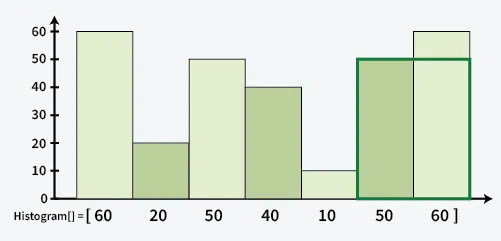

In [ ]:
def get_max_area(hist):
    res = 0
    n = len(hist)

    for i in range(n):
        curr = hist[i]

        # Traverse left while we have a greater height bar
        j = i - 1
        while j >= 0 and hist[j] >= hist[i]:
            curr += hist[i]
            j -= 1

        # Traverse right while we have a greater height bar
        j = i + 1
        while j < n and hist[j] >= hist[i]:
            curr += hist[i]
            j += 1

        res = max(res, curr)

    return res


hist = [60, 20, 50, 40, 10, 50, 60]
print(get_max_area(hist))
# O(n^2)

In [ ]:
# Function to find next smaller for every element
def nextSmaller(hist):
    n = len(hist)

    # Initialize with n for the cases when next smaller
    # does not exist
    nextS = [n] * n
    st = []

    # Traverse all array elements from left to right
    for i in range(n):
        while st and hist[i] < hist[st[-1]]:
            # Setting the index of the next smaller element
            # for the top of the stack
            nextS[st.pop()] = i
        st.append(i)

    return nextS


# Function to find previous smaller for every element
def prevSmaller(hist):
    n = len(hist)

    # Initialize with -1 for the cases when prev smaller
    # does not exist
    prevS = [-1] * n
    st = []

    # Traverse all array elements from left to right
    for i in range(n):
        while st and hist[i] < hist[st[-1]]:
            st.pop()
        if st:
            prevS[i] = st[-1]
        st.append(i)

    return prevS


# Helper function to calculate the maximum rectangular
# area in the histogram
def getMaxArea(hist):
    prevS = prevSmaller(hist)
    nextS = nextSmaller(hist)
    maxArea = 0

    # Calculate the area for each histogram bar
    for i in range(len(hist)):
        width = nextS[i] - prevS[i] - 1
        area = hist[i] * width
        maxArea = max(maxArea, area)

    return maxArea


# Driver code
hist = [60, 20, 50, 40, 10, 50, 60]
print(getMaxArea(hist))

Given an array height[] which represents the height of N people standing in a line. A person i can see a person j if height[j] < height[i] 

and there is no person k standing in between them such that height[k] ≥ height[i]. Find the maximum number of people a person can see.

Input: heights[] = {6, 2, 5, 4, 5, 1, 6}.
Output: 6
Explanation:
Person 1 (height = 6) can see five other people at following positions (2, 3, 4, 5. 6) in addition to himself, i.e. total 6.

Person 2 (height: 2) can see only himself.

Person 3 (height = 5) is able to see people 2nd, 3rd, and 4th person.

Only Person 4 (height = 4) can see himself.

Person 5 (height = 5) can see people 4th, 5th, and 6th.

Person 6 (height =1) can only see himself.

Person 7 (height = 6) can see 2nd, 3rd, 4th, 5th, 6th, and 7th people.

A maximum of six people can be seen by Person 1, 7th

In [ ]:
# Python code to implement the above approach


# Function to store the index
# of next taller person on left
def leftindex(heights, l_heights, n):
    st = []
    for i in range(n):

        # While the top value of the stack
        # is lesser than the
        # current person's height
        while st != [] and heights[st[-1]] < heights[i]:
            st.pop()

        # If the stack is empty
        if st:
            l_heights[i] = st[-1]
        else:
            l_heights[i] = -1
        st.append(i)
    return l_heights


# Function to store the index of
# next taller person on right
def rightindex(heights, r_heights, n):

    # Stack to store the next
    # taller person on its right
    st = []

    for i in range(n - 1, -1, -1):

        # If the top value of the stack
        # is lesser than the current height
        while st != [] and heights[st[-1]] < heights[i]:
            st.pop()

        # If the stack is empty
        if st:
            r_heights[i] = st[-1]
        else:
            r_heights[i] = n
        st.append(i)

    return r_heights


# Function to find the maximum number
# of people a person can see
def max_people(heights, n):

    # To store the answer
    ans = 0
    r_heights = [0 for i in range(n)]
    l_heights = [0 for i in range(n)]
    l_heights = leftindex(heights, l_heights, n)
    r_heights = rightindex(heights, r_heights, n)
    for i in range(n):

        # Contains the leftmost index
        # of the person which
        # current person cannot see
        l_index = l_heights[i]

        # Contains the rightmost index
        # of the person which
        # the current person cannot see
        r_index = r_heights[i]

        # Calculate the maximum answer
        ans = max(ans, r_index - l_index - 1)
    return ans


# Driver code
N = 7
heights = [6, 2, 5, 4, 5, 1, 6]

# Function call
print(max_people(heights, N))

 find the maximum of the minimums for every window size in the given array. The window size varies from 1 to n.

Input: arr[] = {10, 20, 30, 50, 10, 70, 30} 
Output: 70, 30, 20, 10, 10, 10, 10
Explanation: The first element in the output indicates the maximum of minimums of all windows of size 1. 
Minimums of windows of size 1 are {10}, {20}, {30}, {50}, {10}, {70} and {30}. 
Maximum of these minimums is 70
The second element in the output indicates the maximum of minimums of all windows of size 2. 
Minimums of windows of size 2 are {10}, {20}, {30}, {10}, {10}, and {30}. 
Maximum of these minimums is 30
The third element in the output indicates the maximum of minimums of all windows of size 3. 
Minimums of windows of size 3 are {10}, {20}, {10}, {10} and {10}. 
Maximum of these minimums is 20
Similarly, other elements of output are computed.

In [ ]:
# Define the function
# The idea is to find the next smaller and previous smaller of each element and update the maximum of window with size as the difference in their indices.
from collections import deque


def max_of_mins(arr):
    n = len(arr)
    res = [0] * n
    s = deque()

    # Array to store the length of the window
    # where each element is the minimum
    len_arr = [0] * n

    # Traverse through array to determine
    # window sizes using a stack
    for i in range(n):

        # Process elements to find next smaller
        # element on the left
        while s and arr[s[-1]] >= arr[i]:
            top = s.pop()
            window_size = s[-1] if s else i
            len_arr[top] = window_size - (top + 1)
        s.append(i)

    # Process remaining elements in the stack
    # for right boundaries
    while s:
        top = s.pop()
        window_size = n if not s else n - (s[-1] + 1)
        len_arr[top] = window_size

    # Fill res[] based on len_arr[] and arr[]
    for i in range(n):
        window_size = len_arr[i] - 1  # 0-based indexing
        res[window_size] = max(res[window_size], arr[i])

    # Fill remaining entries in res[] to ensure
    # all are max of min
    for i in range(n - 2, -1, -1):
        res[i] = max(res[i], res[i + 1])

    return res


# Driver program
if __name__ == "__main__":
    arr = [10, 20, 30, 50, 10, 70, 30]
    res = max_of_mins(arr)
    print(" ".join(map(str, res)))

Given an array arr[] of size N. The task is to count the number of unique differences between the

two maximum elements of every subarray of size at least 2 of the given array.

Input: arr[] = { 5, 1, 3 }, N = 3
Output: 2
Explanation: The subarrays are {5, 1}, {5, 1, 3}, {1, 3}.
{5, 1} – First max = 5; Second max = 1; difference = (5 – 1) = 4
{5, 1, 3} – First max = 5; Second max = 3; difference = (5 – 3) = 2
{1, 3} – First max = 3; Second max = 1; difference = (3 – 1) = 2
Unique height differences are {4, 2} = 2

In [ ]:
def DistinctR(arr, n):
    dist = set([])
    firstMax = 0
    secondMax = 0

    for i in range(0, n - 1):
        firstMax = arr[i]
        secondMax = -2147483647 - 1

        for j in range(i + 1, n):
            if firstMax < arr[j]:
                secondMax = firstMax
                firstMax = arr[j]
            elif secondMax < arr[j]:
                secondMax = arr[j]

            dist.add(firstMax - secondMax)

    return len(dist)


arr = [5, 1, 3]
n = len(arr)
print(DistinctR(arr, n))

# This code is contributed by akashish__

In [ ]:
# Python 3 code to implement above approach


# Function to count the number
# of unique differences
def countUnique(arr, n):

    # Arrays to store next greater
    # to the left and next greater
    # to the right for every arr[i]
    ngl = [0] * (n)
    ngr = [0] * (n)
    st = []
    s = set([])

    # Loop to find next greater element
    # to the left of arr[i]
    ngl[0] = -1
    st.append(arr[0])
    for i in range(1, n):
        while len(st) > 0 and arr[i] > st[-1]:
            st.pop()

        if len(st) == 0:
            ngl[i] = -1

        else:
            ngl[i] = st[-1]

        st.append(arr[i])

    while len(st) > 0:
        st.pop()

    # Loop to find next greater element
    # to the left of arr[i]
    ngr[n - 1] = -1
    st.append(arr[n - 1])
    for i in range(n - 2, -1, -1):
        while len(st) > 0 and arr[i] >= st[-1]:
            st.pop()

        if len(st) != 0:
            ngr[i] = st[-1]

        else:
            ngr[i] = -1

        st.append(arr[i])

    for i in range(n):
        if ngl[i] != -1:
            s.add(ngl[i] - arr[i])

        if ngr[i] != -1:
            s.add(ngr[i] - arr[i])

    return len(s)


# Driver code
if __name__ == "__main__":

    N = 4
    arr = [5, 2, 3, 8]
    print(countUnique(arr, N))

    # This code is contributed by ukasp.

 L and R,  the task is to find the sum of array elements over the range [L, R] if the given array arr[] is concatenating to itself infinite times.

In [23]:
def rangeSum(arr, N, L, R):

    # Stores the sum of array elements
    # from L to R
    sum = 0

    # Traverse from L to R
    for i in range(L - 1, R, 1):
        sum += arr[i % N]

    # Print the resultant sum
    print(sum)


# Driver Code
if __name__ == "__main__":
    arr = [5, 2, 6, 9]
    L = 10
    R = 13
    N = len(arr)
    rangeSum(arr, N, L, R)

22


In [ ]:
# Python 3 program for the above approach


# Function to find the sum of elements
# in a given range of an infinite array
def rangeSum(arr, N, L, R):

    # Stores the prefix sum
    prefix = [0 for i in range(N + 1)]
    prefix[0] = 0

    # Calculate the prefix sum
    for i in range(1, N + 1, 1):
        prefix[i] = prefix[i - 1] + arr[i - 1]

    # Stores the sum of elements
    # from 1 to L-1
    leftsum = ((L - 1) // N) * prefix[N] + prefix[(L - 1) % N]

    # Stores the sum of elements
    # from 1 to R
    rightsum = (R // N) * prefix[N] + prefix[R % N]

    # Print the resultant sum
    print(rightsum - leftsum)


# Driver Code
if __name__ == "__main__":
    arr = [5, 2, 6, 9]
    L = 10
    R = 13
    N = len(arr)
    rangeSum(arr, N, L, R)

    # This code is contributed by SURENDRA_GANGWAR.

In [24]:
# Python program to find Maximum Product Subarray using Minimum
# Maximum Product ending at every index


# function to find the product of max product subarray.
def max_product(arr):
    n = len(arr)

    # max product ending at the current index
    currMax = arr[0]

    # min product ending at the current index
    currMin = arr[0]

    # Initialize overall max product
    maxProd = arr[0]

    # Iterate through the array
    for i in range(1, n):

        # Temporary variable to store the maximum product ending
        # at the current index
        temp = max(arr[i], arr[i] * currMax, arr[i] * currMin)

        # Update the minimum product ending at the current index
        currMin = min(arr[i], arr[i] * currMax, arr[i] * currMin)

        # Update the maximum product ending at the current index
        currMax = temp

        # Update the overall maximum product
        maxProd = max(maxProd, currMax)

    return maxProd


if __name__ == "__main__":
    arr = [-2, 6, -3, -10, 0, 2]
    print(max_product(arr))

180


at[i][j] = 1 means ith person knows jth person, the task is to find the celebrity. A celebrity is a person who is known to all but does not know anyone.

In [ ]:
# python program to find celebrity
def knows(a, b, matrix):
    return matrix[a][b]


# Returns -1 if celebrity
# is not present. If present,
# returns id (value from 0 to n-1).
def findCelebrity(n, matrix):
    # the graph needs not be constructed
    # as the edges can be found by
    # using knows function

    # degree array;
    indegree = [0] * n
    outdegree = [0] * n

    # query for all edges
    for i in range(n):
        for j in range(n):
            x = knows(i, j, matrix)

            # set the degrees
            outdegree[i] += x
            indegree[j] += x

    # find a person with indegree n-1
    # and out degree 0
    for i in range(n):
        if indegree[i] == n - 1 and outdegree[i] == 0:
            return i

    return -1


# Driver code
if __name__ == "__main__":
    n = 4
    matrix = [[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0]]
    id = findCelebrity(n, matrix)
    if id == -1:
        print("No celebrity")
    else:
        print(f"Celebrity ID {id}")

In [ ]:
# python program to find celebrity using
# stack data structure


def knows(a, b, matrix):
    return matrix[a][b] == 1


# Returns -1 if celebrity is not present. If present, returns id (value from 0 to n-1).


def findCelebrity(n, matrix):
    stack = []
    # Celebrity
    C = -1

    # Push everybody to stack
    for i in range(n):
        stack.append(i)

    # Extract top 2

    # Find a potential celebrity
    while len(stack) > 1:
        A = stack.pop()
        B = stack.pop()
        if knows(A, B, matrix):
            stack.append(B)
        else:
            stack.append(A)

    # Potential candidate?
    C = stack.pop()

    # Check if C is actually a celebrity or not
    for i in range(n):
        # If any person doesn't know 'C' or 'C' doesn't know any person, return -1
        if i != C and (knows(C, i, matrix) or not knows(i, C, matrix)):
            return -1

    return C


def main():
    n = 4
    matrix = [[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0]]

    id = findCelebrity(n, matrix)
    if id == -1:
        print("No celebrity")
    else:
        print(f"Celebrity ID {id}")


if __name__ == "__main__":
    main()

iven a bracket sequence or in other words a string S of length n, consisting of characters ‘(‘ and ‘)’. Find the length of the maximum correct bracket subsequence of sequence for a given query range. 

In [5]:
def constructBalanceArray(BOP, BCP, s, n):
    stk = []  # No need to push -1 as mentioned in the comment; we never use that

    for i in range(n):
        if s[i] == "(":
            stk.append(i)
        else:
            if stk:
                open_index = stk.pop()
                BOP[open_index] = 1
                BCP[i] = 1
            # No else needed here; the initial values are zero

    # Convert to prefix sums
    for i in range(1, n):
        BOP[i] += BOP[i - 1]
        BCP[i] += BCP[i - 1]


def query(BOP, BCP, s, e):
    s_adjusted = s - 1  # Adjusting for 0-based index access
    e_adjusted = e

    if s_adjusted > 0 and BOP[s_adjusted - 1] == BOP[s_adjusted]:
        return (BCP[e_adjusted] - BOP[s_adjusted]) * 2
    else:
        return (BCP[e_adjusted] - (BOP[s_adjusted - 1] if s_adjusted > 0 else 0)) * 2


if __name__ == "__main__":
    string = "())(())(())("
    n = len(string)

    BCP = [0] * n
    BOP = [0] * n

    constructBalanceArray(BOP, BCP, string, n)

    queries = [(5, 11), (4, 5), (1, 5)]
    for start, end in queries:
        max_length = query(BOP, BCP, start, end)
        print(
            f"Maximum Length of Balanced Bracket Subsequence from {start} to {end} = {max_length}"
        )

Maximum Length of Balanced Bracket Subsequence from 5 to 11 = 6
Maximum Length of Balanced Bracket Subsequence from 4 to 5 = 2
Maximum Length of Balanced Bracket Subsequence from 1 to 5 = 4


Maximum of all subarrays of size K

In [6]:
# Python3 program to find the maximum for
# each and every contiguous subarray of
# size K

from collections import deque

# A Deque (Double ended queue) based
# method for printing maximum element
# of all subarrays of size K


def printMax(arr, N, K):
    """Create a Double Ended Queue, Qi that
    will store indexes of array elements.
    The queue will store indexes of useful
    elements in every window and it will
    maintain decreasing order of values from
    front to rear in Qi, i.e., arr[Qi.front[]]
    to arr[Qi.rear()] are sorted in decreasing
    order"""
    Qi = deque()

    # Process first k (or first window)
    # elements of array
    for i in range(K):

        # For every element, the previous
        # smaller elements are useless
        # so remove them from Qi
        while Qi and arr[i] >= arr[Qi[-1]]:
            Qi.pop()

        # Add new element at rear of queue
        Qi.append(i)

    # Process rest of the elements, i.e.
    # from arr[k] to arr[n-1]
    for i in range(K, N):

        # The element at the front of the
        # queue is the largest element of
        # previous window, so print it
        print(str(arr[Qi[0]]) + " ", end="")

        # Remove the elements which are
        # out of this window
        while Qi and Qi[0] <= i - K:

            # remove from front of deque
            Qi.popleft()

        # Remove all elements smaller than
        # the currently being added element
        # (Remove useless elements)
        while Qi and arr[i] >= arr[Qi[-1]]:
            Qi.pop()

        # Add current element at the rear of Qi
        Qi.append(i)

    # Print the maximum element of last window
    print(str(arr[Qi[0]]))


# Driver's code
if __name__ == "__main__":
    arr = [12, 1, 78, 90, 57, 89, 56]
    K = 3

    # Function call
    printMax(arr, len(arr), K)

78 90 90 90 89


First Negative In Every Window

For the given array 'ARR' = [5, -3, 2, 3, -4] and 'K' = 2.
Output = -3 -3 0 -4

We have four windows of length 2 in 'ARR'
[5, -3] having -3 as first negative element.
[-3, 2] having -3 as first negative element.
[2, 3] having no negative element
[2, -4] having -4 as first negative element.

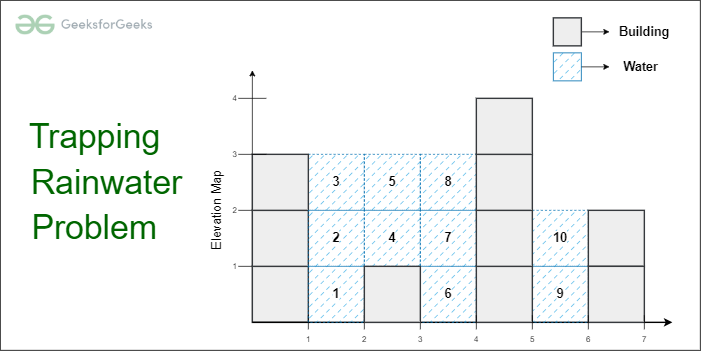

In [8]:
def maxWater(arr):
    left = 1
    right = len(arr) - 2

    # lMax : Maximum in subarray arr[0..left-1]
    # rMax : Maximum in subarray arr[right+1..n-1]
    lMax = arr[left - 1]
    rMax = arr[right + 1]

    res = 0
    while left <= right:

        # If rMax is smaller, then we can decide the
        # amount of water for arr[right]
        if rMax <= lMax:

            # Add the water for arr[right]
            res += max(0, rMax - arr[right])

            # Update right max
            rMax = max(rMax, arr[right])

            # Update right pointer as we have decided
            # the amount of water for this
            right -= 1
        else:

            # Add the water for arr[left]
            res += max(0, lMax - arr[left])

            # Update left max
            lMax = max(lMax, arr[left])

            # Update left pointer as we have decided
            # the amount of water for this
            left += 1
    return res


if __name__ == "__main__":
    arr = [3, 0, 1, 0, 4, 0, 2]
    print(maxWater(arr))

10
